In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import env
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
train, test = train_test_split(df, train_size=.8)

In [4]:
X = train[['petal_width','sepal_width']]

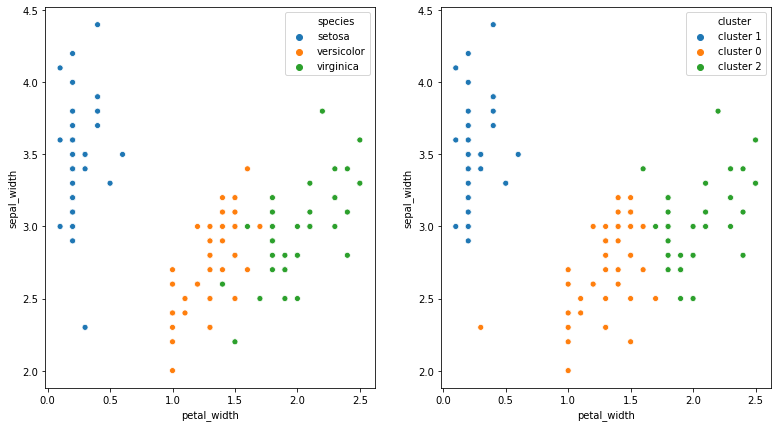

In [5]:
kmeans = KMeans(3)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)
train.cluster = 'cluster ' + train.cluster.astype(str)

plt.rc('figure',figsize=(13, 7))

plt.subplot(121)
sns.scatterplot(train.petal_width, train.sepal_width, 
                hue=train.species)
plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.subplot(122)
sns.scatterplot(train.petal_width, train.sepal_width,
                hue=train.cluster)

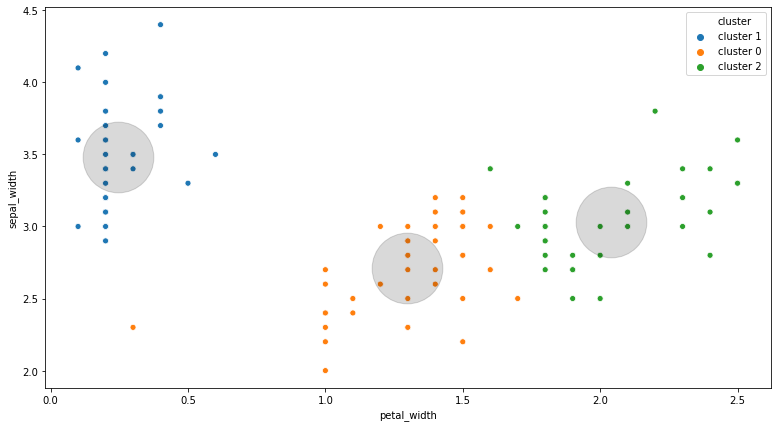

In [6]:
sns.scatterplot(train.petal_width, train.sepal_width, 
                hue=train.cluster)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(y='sepal_width', x='petal_width',
                       ax=plt.gca(), alpha=.15, s=5000, c='black')
plt.legend()

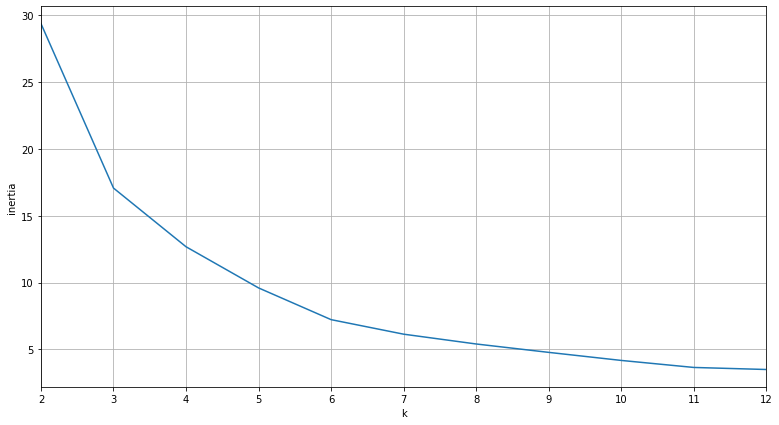

In [7]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

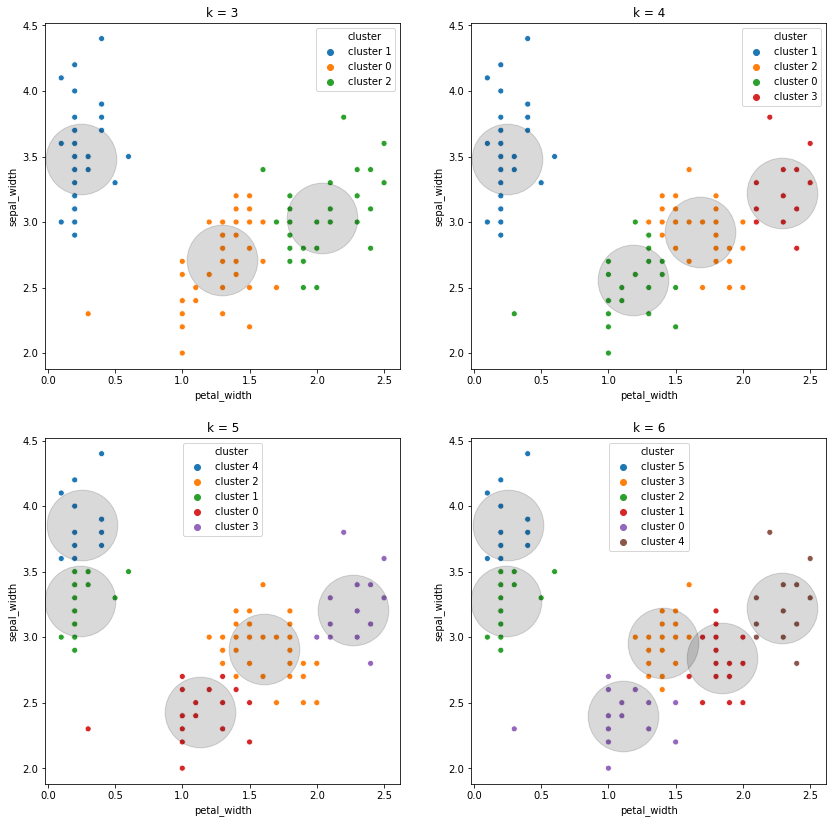

In [8]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    train['cluster'] = kmeans.predict(X)
    train.cluster = 'cluster ' + train.cluster.astype(str)
    sns.scatterplot(train.petal_width, train.sepal_width, 
                    hue=train.cluster)
    centroids = pd.DataFrame(kmeans.cluster_centers_, 
                             columns=X.columns)
    centroids.plot.scatter(y='sepal_width', x='petal_width', 
                           ax=plt.gca(), alpha=.15, s=5000, 
                           c='black')
    plt.title(f'k = {k}')

In [9]:
X2 = train[['petal_width','sepal_width', 'petal_length']]

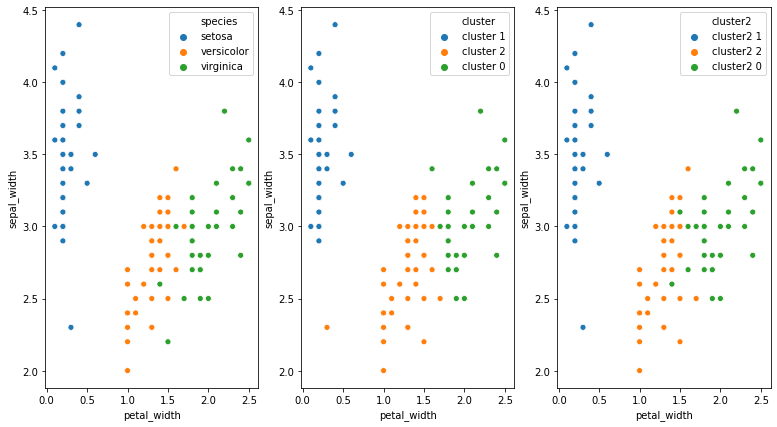

In [10]:
kmeans = KMeans(3)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)
train.cluster = 'cluster ' + train.cluster.astype(str)

kmeans.fit(X2)
train['cluster2'] = kmeans.predict(X2)
train.cluster2 = 'cluster2 ' + train.cluster2.astype(str)

plt.rc('figure',figsize=(13, 7))

plt.subplot(131)
sns.scatterplot(train.petal_width, train.sepal_width, 
                hue=train.species)
plt.subplot(132)
sns.scatterplot(train.petal_width, train.sepal_width, 
                hue=train.cluster)
plt.legend()
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.subplot(133)
sns.scatterplot(train.petal_width, train.sepal_width, 
                hue=train.cluster2)

In [11]:
train.cluster.replace({'cluster 1': 'setosa', 
                       'cluster 0': 'versicolor',
                    'cluster 2': 'virginica'}, inplace=True)
train.cluster2.replace({'cluster2 0': 'setosa', 
                        'cluster2 2': 'versicolor',
                    'cluster2 1': 'virginica'}, inplace=True)

In [12]:
(train.species == train.cluster).sum() / train.shape[0], \
(train.species == train.cluster2).sum() / train.shape[0]

(0.39166666666666666, 0.30833333333333335)

In [13]:
url = env.get_db_url('mall_customers')
query = '''
    SELECT * FROM customers
'''
df = pd.read_sql(query, url)

In [14]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
len(df.spending_score.value_counts())

84

In [16]:
train, test = train_test_split(df, train_size=.8)

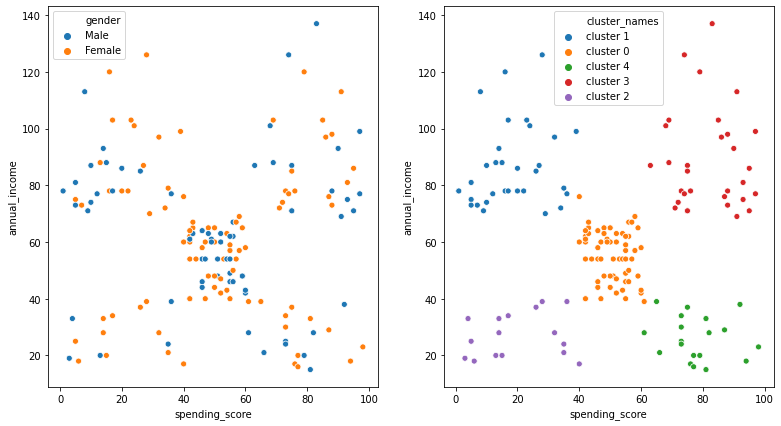

In [17]:
X = train[['annual_income','spending_score']]

kmeans = KMeans(5)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)
train['cluster_names'] = 'cluster ' + train.cluster.astype(str)

plt.subplot(121)
sns.scatterplot(train.spending_score, train.annual_income, 
                hue=train.gender)
plt.legend()
plt.xlabel('spending_score')
plt.ylabel('annual_income')
plt.subplot(122)
sns.scatterplot(train.spending_score, train.annual_income,
                hue=train.cluster_names)

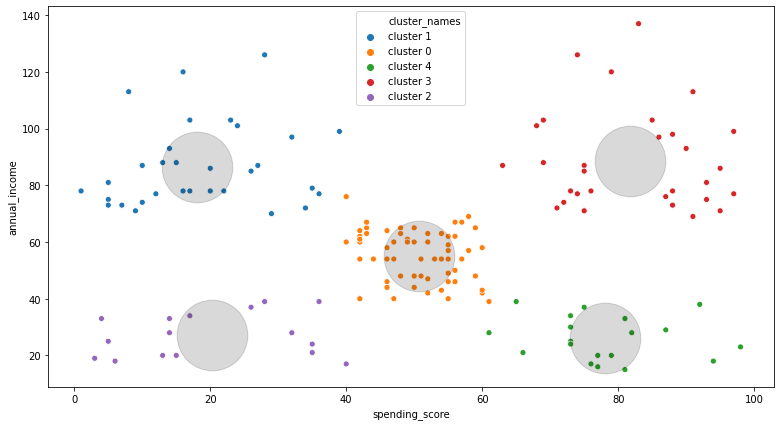

In [18]:
sns.scatterplot(train.spending_score, train.annual_income, 
                hue=train.cluster_names)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='spending_score', y='annual_income',
                       ax=plt.gca(), alpha=.15, s=5000, c='black')
plt.legend()

In [19]:
train.groupby('cluster').age.mean()

cluster
0    42.419355
1    40.218750
2    44.812500
3    33.096774
4    24.894737
Name: age, dtype: float64

In [20]:
scaler2 = MinMaxScaler()
X2 = pd.DataFrame(scaler2.fit_transform(X), columns = X.columns)
X2.head()

,annual_income,spending_score
0,0.639344,0.134021
1,0.352459,0.608247
2,0.319672,0.422680
3,0.180328,0.762887
4,0.590164,0.092784


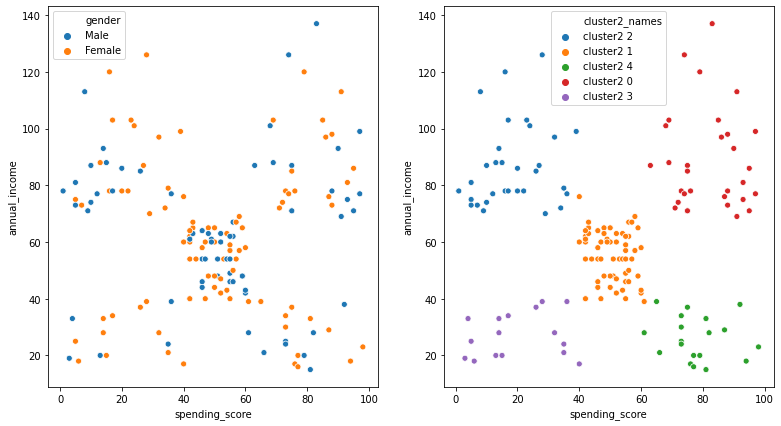

In [21]:
kmeans2 = KMeans(5)
kmeans2.fit(X2)
train['cluster2'] = kmeans2.labels_
train['cluster2_names'] = 'cluster2 ' + train.cluster2.astype(str)

plt.subplot(121)
sns.scatterplot(X.spending_score, X.annual_income, 
                hue=train.gender)
plt.legend()
plt.xlabel('spending_score')
plt.ylabel('annual_income')
plt.subplot(122)
sns.scatterplot(X.spending_score, X.annual_income, 
                hue=train.cluster2_names)

In [22]:
pd.DataFrame(kmeans2.cluster_centers_, columns=X.columns)

,annual_income,spending_score
0,0.602591,0.832724
1,0.327869,0.512138
2,0.585553,0.175258
3,0.099898,0.197809
4,0.090595,0.794357


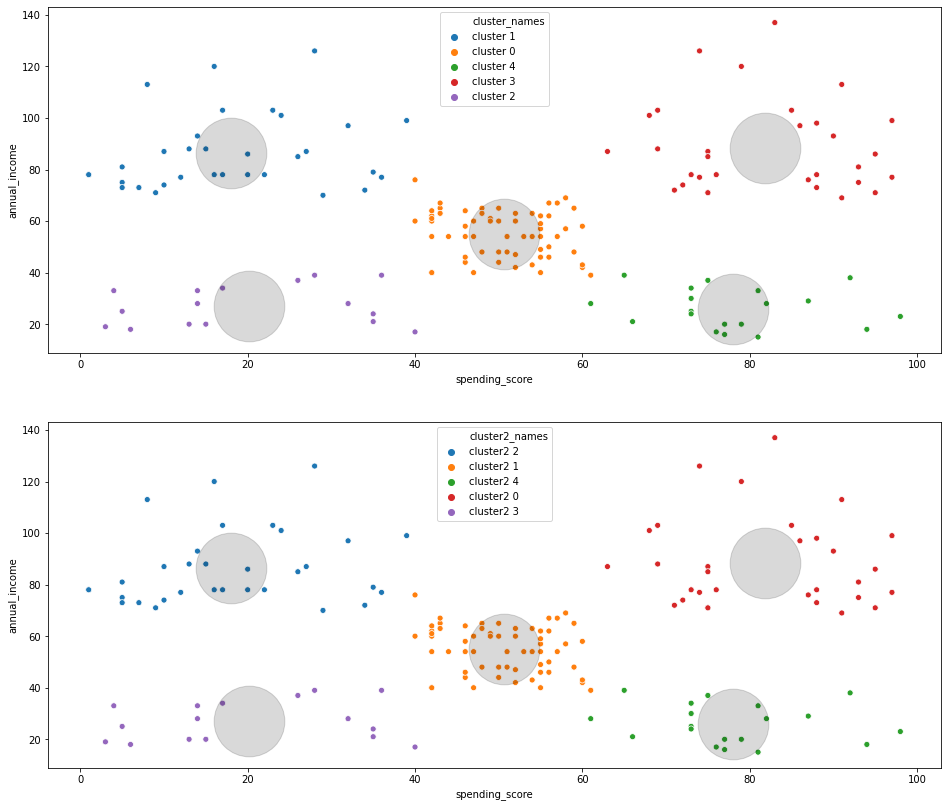

In [23]:
f, axes = plt.subplots(2,1, figsize=(16,14))
sns.scatterplot(X.spending_score, X.annual_income, 
                        hue=train.cluster_names, ax=axes[0])
centroids = pd.DataFrame(kmeans.cluster_centers_, 
                        columns=X.columns)
centroids.plot.scatter(x='spending_score', y='annual_income', 
                        ax=axes[0],  alpha=.15, s=5000, c='black')
sns.scatterplot(X.spending_score, X.annual_income, 
                        hue=train.cluster2_names, ax=axes[1])
centroids = pd.DataFrame(scaler2.inverse_transform(
                        kmeans2.cluster_centers_), columns=X.columns)
centroids.plot.scatter(x='spending_score', y='annual_income',
                        ax=axes[1], alpha=.15, s=5000, c='black')

In [24]:
train['gender_encoded'] = train.gender=='Male'
train.gender_encoded = train.gender_encoded.astype(int)
train.head()

,customer_id,gender,age,annual_income,spending_score,cluster,cluster_names,cluster2,cluster2_names,gender_encoded
178,179,Male,59,93,14,1,cluster 1,2,cluster2 2,1
88,89,Female,34,58,60,0,cluster 0,1,cluster2 1,0
79,80,Female,49,54,42,0,cluster 0,1,cluster2 1,0
39,40,Female,20,37,75,4,cluster 4,4,cluster2 4,0
172,173,Male,36,87,10,1,cluster 1,2,cluster2 2,1


In [33]:
X3 = train[['annual_income','spending_score',]]
X3.head()

,annual_income,spending_score
178,93,14
88,58,60
79,54,42
39,37,75
172,87,10


In [34]:
scaler3 = MinMaxScaler(feature_range=(0, 3))
X3 = pd.DataFrame(scaler3.fit_transform(X3), columns = X3.columns, 
                 index=X3.index)
X3 = pd.concat([X3, train.gender_encoded], axis=1)

In [35]:
kmeans3 = KMeans(5)
kmeans3.fit(X3)
train['cluster3'] = kmeans3.predict(X3)
train['cluster3_names'] = 'cluster3 ' + train.cluster3.astype(str)

In [41]:
m = np.c_[scaler3.inverse_transform(
            kmeans.cluster_centers_[:, :2]), 
          kmeans.cluster_centers_[:, -1]]
centroids = pd.DataFrame(m, columns=X3.columns)
centroids3 = centroids.round(4)
centroids3.head()

,annual_income,spending_score,gender_encoded
0,2251.6667,1639.5699,50.6774
1,3530.1250,583.0000,18.0000
2,1120.6250,653.7292,20.1875
3,3614.6559,2645.0323,81.7742
4,1074.4737,2524.7018,78.0526


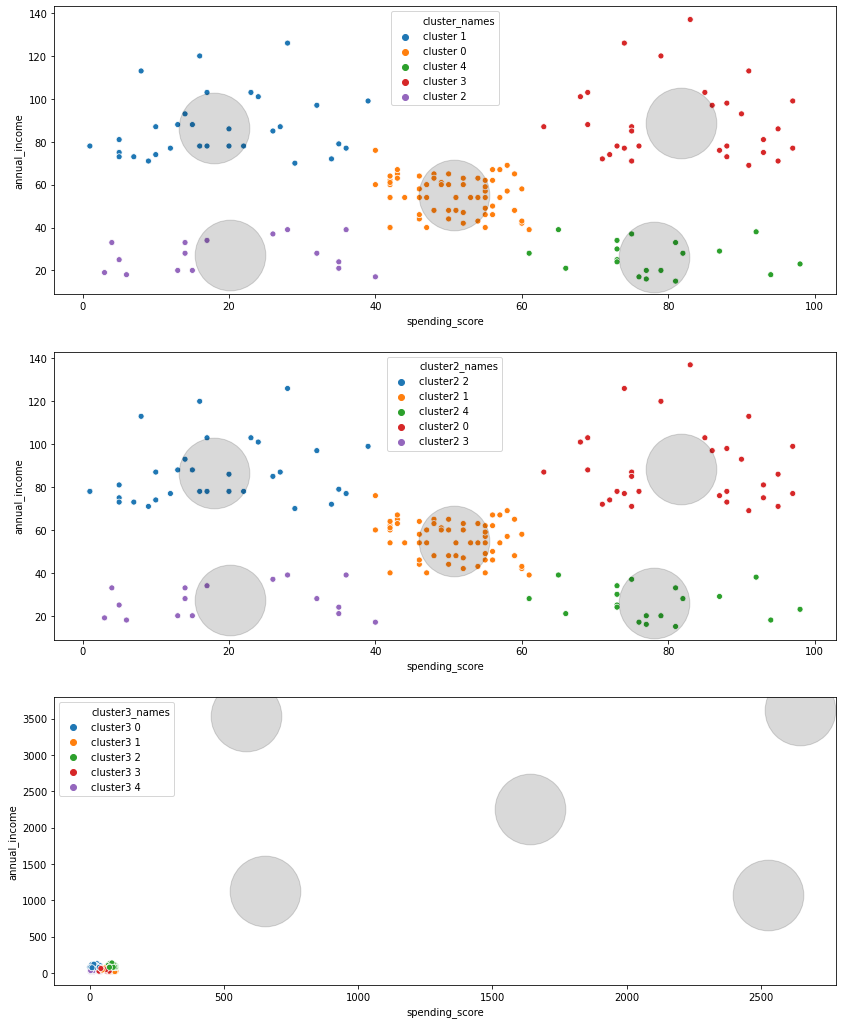

In [40]:
f, axes = plt.subplots(3,1, figsize=(14,18))
sns.scatterplot(X.spending_score, X.annual_income, 
                        hue=train.cluster_names, ax=axes[0])
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='spending_score', y='annual_income', 
                       ax=axes[0], alpha=.15, s=5000, c='black')
sns.scatterplot(X.spending_score, X.annual_income, 
                        hue=train.cluster2_names, ax=axes[1])
centroids = pd.DataFrame(scaler2.inverse_transform(
                        kmeans2.cluster_centers_), 
                         columns=X2.columns)
centroids.plot.scatter(x='spending_score', y='annual_income', 
                       ax=axes[1],  alpha=.15, s=5000, c='black')
sns.scatterplot(X.spending_score, X.annual_income,
                        hue=train.cluster3_names, ax=axes[2])
# centroids = pd.DataFrame(scaler3.inverse_transform(
#                         kmeans3.cluster_centers_), 
#                          columns=X3.columns)
centroids3.plot.scatter(x='spending_score', y='annual_income',
                       ax=axes[2], alpha=.15, s=5000, c='black')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster, subset in train.groupby('cluster2_names'):
    ax.scatter(X.spending_score, X.annual_income,
               X3.gender_encoded, 
           c=train.cluster2.tolist(), label=cluster)
plt.legend()